In [17]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
folderInput = "./input/detectFace/"

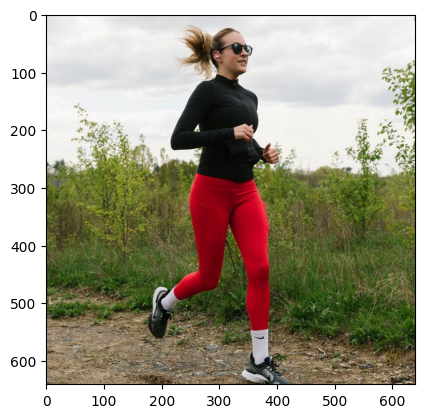

In [18]:
imgPath = "2.jpg"
fullPath = folderInput + imgPath

imBRG = cv2.imread(fullPath)
imRGB = cv2.cvtColor(imBRG, cv2.COLOR_BGR2RGB)

plt.imshow(imRGB)
plt.show()


In [19]:
gray_image = cv2.cvtColor(imRGB, cv2.COLOR_BGR2GRAY)

In [20]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [21]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [22]:
# !pip install --upgrade pip


# !pip install retina-face

from retinaface import RetinaFace

In [23]:
obj = RetinaFace.detect_faces(fullPath)

In [24]:
print(obj)

{'face_1': {'score': 0.9988586902618408, 'facial_area': [302, 32, 352, 102], 'landmarks': {'right_eye': [329.85367, 59.05348], 'left_eye': [345.79977, 60.578064], 'nose': [345.96774, 68.65093], 'mouth_right': [331.8314, 82.74711], 'mouth_left': [345.52435, 84.406105]}}}


In [25]:
for key in obj.keys():
    identity = obj[key]
    facial_area = identity["facial_area"]
    
    cropped_face = imRGB[facial_area[1]:facial_area[3], facial_area[0]:facial_area[2]]
    cropped_face_rgb = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)
    # Lưu khuôn mặt đã cắt
    cv2.imwrite("cropped_face_" + str(key) + ".jpg", cropped_face_rgb)
    
    
    cv2.rectangle(imRGB, (facial_area[2], facial_area[3]),
                  (facial_area[0], facial_area[1]), (255, 0, 255), 10)

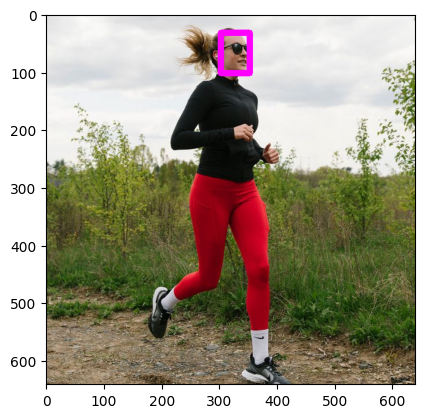

In [26]:

plt.imshow(imRGB)

In [27]:
# !pip install deepface
from deepface import DeepFace

imgPath1 = "1.jpg"
imgPath2 = "cr72.jpg"

fullPath1 = folderInput + imgPath1
fullPath2 = folderInput + imgPath2


obj = DeepFace.verify(fullPath1, fullPath2
          , model_name = 'ArcFace', detector_backend = 'retinaface')
print(obj["verified"])

False


In [28]:
xinh1 = folderInput + "xinh1.jpg"
extract = embedding_objs = DeepFace.represent(img_path = xinh1, enforce_detection  = False)


In [29]:
print(np.array(extract))
with open('extracted_faces.txt', 'w') as file:
        file.write('extract = ' + str(extract))

[{'embedding': [0.0, 0.0, 0.0025315324278622, 0.0, 0.0, 0.0, 0.006009863202911829, 0.0, 0.0, 0.029710126305101666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.038465778780817694, 0.03330648000081518, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017602293796455327, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0113302565270269, 0.05039137879523797, 0.0, 0.034797466657319684, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02463506405936494, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07618985282603552, 0.0, 0.05627301071512392, 0.0, 0.0, 0.0, 0.05424473489636666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012100829712424243, 0.0, 0.0, 0.013270888345456549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032791665430939726, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.027930299676885786, 0.0, 0.0, 

In [30]:
DeepFace.find()

TypeError: find() missing 2 required positional arguments: 'img_path' and 'db_path'